In [57]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

pd.pandas.set_option("display.max_columns", None)

In [58]:
dataset_train = pd.read_csv("train.csv")
dataset_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [59]:
dataset_train.shape

(1460, 81)

In [62]:
# getting the numerical features with nan values 

features_with_nan_values = [feature for feature in dataset_train.columns if dataset_train[feature].isnull().sum()>1 and dataset_train[feature].dtype != "O"]
len(features_with_nan_values)


3

In [5]:
for feature in features_with_nan_values:
    print("NaN values in", feature, "is {} %".format(np.round((dataset_train[feature].isnull().sum())/len(dataset_train[feature]), 4)))

NaN values in LotFrontage is 0.1774 %
NaN values in MasVnrArea is 0.0055 %
NaN values in GarageYrBlt is 0.0555 %


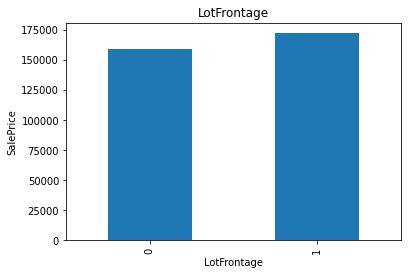

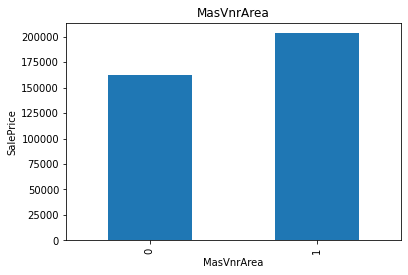

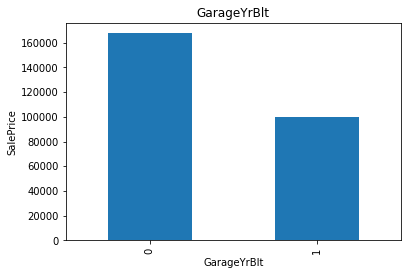

In [6]:
for feature in features_with_nan_values:
    data_train = dataset_train.copy()
    data_train[feature] = np.where(data_train[feature].isnull(), 1, 0)
    data_train.groupby(feature)["SalePrice"].median().plot.bar()
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.show()


In [7]:
for feature in features_with_nan_values:
    median_value = dataset_train[feature].median()
    dataset_train[feature] = dataset_train[feature].fillna(median_value)

dataset_train[features_with_nan_values].isnull().sum()


LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [8]:
# finding the year features from the dataset_train
year_feature = [feature for feature in dataset_train if "Yr" in feature or "Year" in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [9]:
for feature in year_feature:
    dataset_train[feature] = dataset_train["YrSold"] - dataset_train[feature]
    
dataset_train = dataset_train.drop(["YrSold"], axis = 1)


In [10]:
year_feature.remove("YrSold")
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

In [11]:
dataset_train[year_feature].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


In [12]:
# getting the numerical feature
numerical_features = [feature for feature in dataset_train.columns if dataset_train[feature].dtype != "O"]
len(numerical_features)

37

In [13]:
# finding the discreate feature for getting the continuous feature 
discreate_feature = [feature for feature in dataset_train.columns if len(dataset_train[feature].unique())<25 and feature not in year_feature + ["Id"] and dataset_train[feature].dtype != "O"]

In [14]:
len(discreate_feature)

17

In [15]:
# below is to get continuous feature
continuous_feature = [feature for feature in numerical_features if feature not in discreate_feature + ["Id"]]
len(continuous_feature)

19

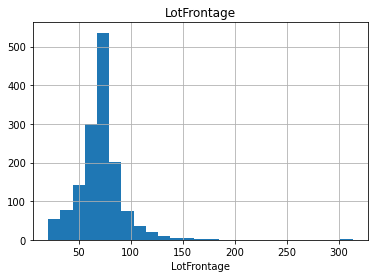

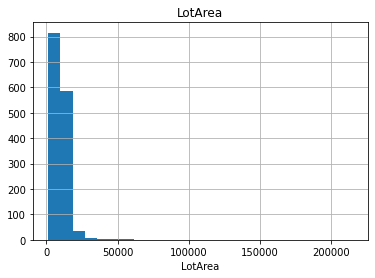

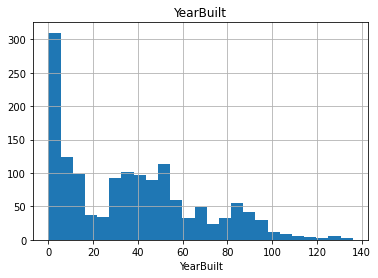

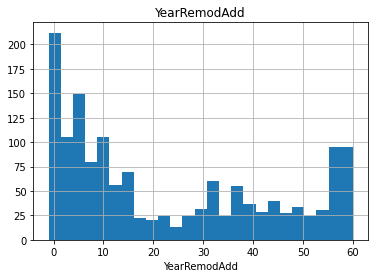

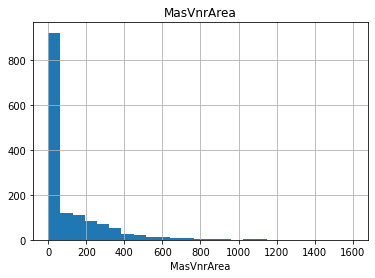

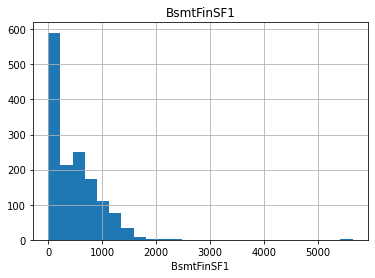

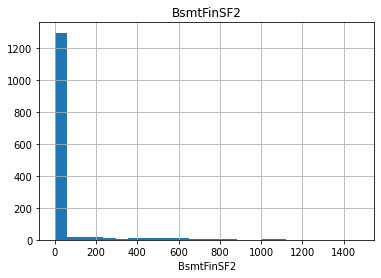

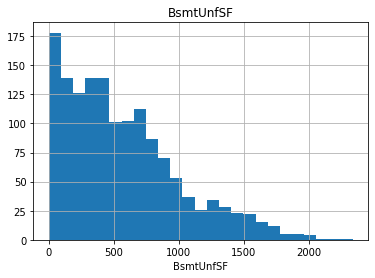

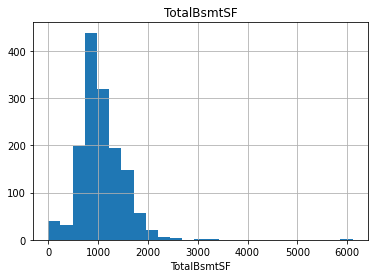

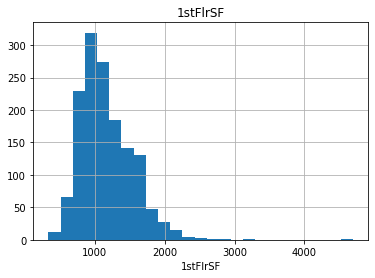

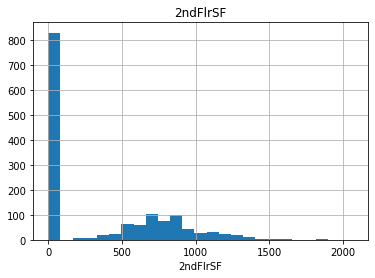

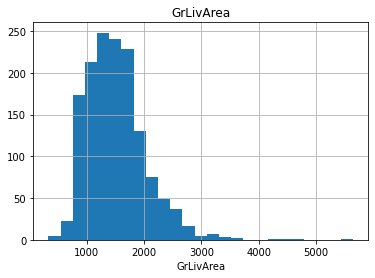

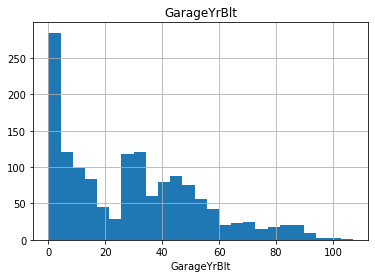

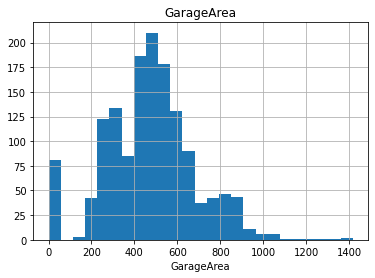

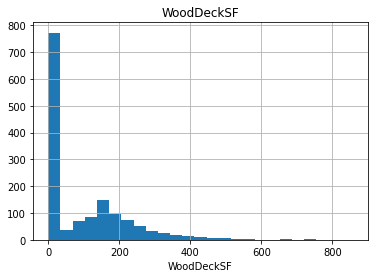

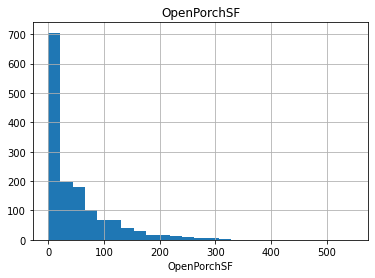

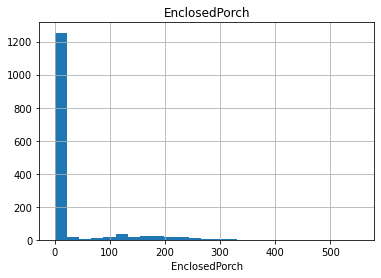

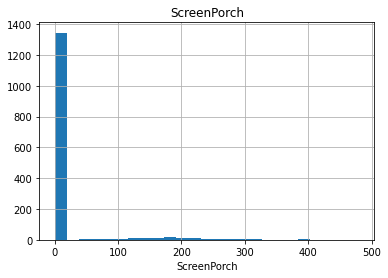

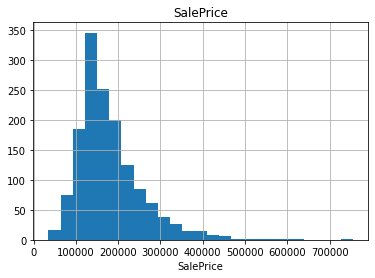

In [16]:
for feature in continuous_feature:
    dataset_train[feature].hist(bins  = 25)
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

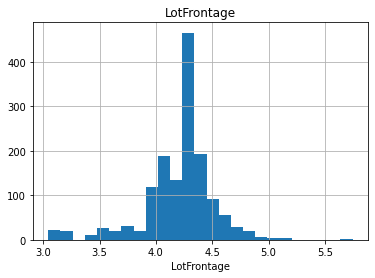

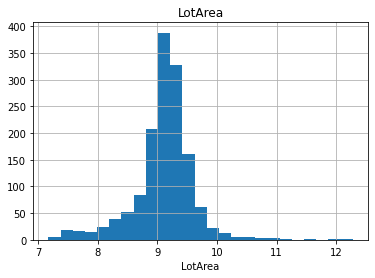

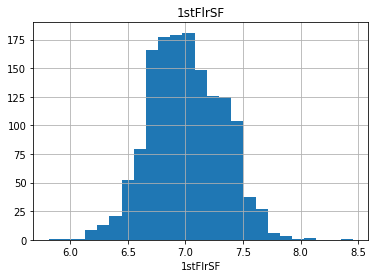

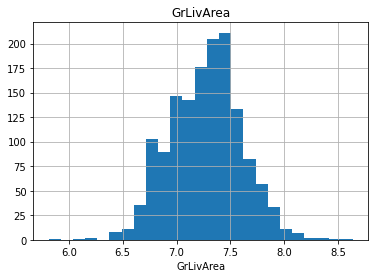

In [17]:
# Transfering the skewed data into logrithmic normalization to make data as normal distribution

for feature in continuous_feature:
    if 0 in dataset_train[feature].unique() or feature == "SalePrice":
        pass
    else:
        dataset_train[feature] = np.log(dataset_train[feature])
        dataset_train[feature].hist(bins = 25)
        plt.xlabel(feature)
        plt.title(feature)
        plt.show()

In [18]:
# finding the categorical feature
categorical_feature = [feature for feature in dataset_train.columns if dataset_train[feature].dtype == "O"]
len(categorical_feature)

43

In [19]:
categorical_feature_with_nan_value = [feature for feature in categorical_feature if dataset_train[feature].isnull().sum()>1]
len(categorical_feature_with_nan_value)

15

In [20]:
for feature in categorical_feature_with_nan_value:
    percentage_of_nan = ((dataset_train[feature].isnull().sum())/(len(dataset_train[feature])))*100
    print("In", feature, "NaN Values are", "{} %".format(np.round(percentage_of_nan, 4)))

In Alley NaN Values are 93.7671 %
In MasVnrType NaN Values are 0.5479 %
In BsmtQual NaN Values are 2.5342 %
In BsmtCond NaN Values are 2.5342 %
In BsmtExposure NaN Values are 2.6027 %
In BsmtFinType1 NaN Values are 2.5342 %
In BsmtFinType2 NaN Values are 2.6027 %
In FireplaceQu NaN Values are 47.2603 %
In GarageType NaN Values are 5.5479 %
In GarageFinish NaN Values are 5.5479 %
In GarageQual NaN Values are 5.5479 %
In GarageCond NaN Values are 5.5479 %
In PoolQC NaN Values are 99.5205 %
In Fence NaN Values are 80.7534 %
In MiscFeature NaN Values are 96.3014 %


In [21]:
# handling the nan values from categorical features 

for feature in categorical_feature_with_nan_value:
    dataset_train[feature] = dataset_train[feature].fillna("Missing")
    print(dataset_train[feature].isnull().sum())


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [22]:
# handling the rare variables from dataset_train so that when we will get the numerical version of categorical features then we will not get redundant features

for feature in categorical_feature:
    var = dataset_train.groupby(feature)["SalePrice"].count()/len(dataset_train[feature]) # storing the fraction of a particular category 
    Rare_var = var[var<0.01].index
    dataset_train[feature] = np.where(dataset_train[feature].isin(Rare_var), "Rare Variable", dataset_train[feature])

In [23]:
dataset_train[categorical_feature].head(20)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Missing,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
1,RL,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Rare Variable,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
2,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
3,RL,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,Missing,Missing,Missing,WD,Abnorml
4,RL,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
5,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,Rare Variable,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Missing,Attchd,Unf,TA,TA,Y,Missing,MnPrv,Shed,WD,Normal
6,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
7,RL,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,Stone,TA,TA,CBlock,Gd,TA,Mn,ALQ,BLQ,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Shed,WD,Normal
8,RM,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Shng,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Gd,Y,FuseF,TA,Min1,TA,Detchd,Unf,Fa,TA,Y,Missing,Missing,Missing,WD,Abnorml
9,RL,Pave,Missing,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Rare Variable,2fmCon,Rare Variable,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,BrkTil,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,Rare Variable,TA,Y,Missing,Missing,Missing,WD,Normal


In [66]:
# converting the categorical features into numerical features

for feature in categorical_feature:
    sort_the_mean = dataset_train.groupby(feature)["SalePrice"].mean().sort_values().index
    # print(sort_the_mean)
    label_ordered = {i:k for k, i in enumerate(sort_the_mean, 0)}
    dataset_train[feature] = dataset_train[feature].map(label_ordered)

    

In [25]:
dataset_train[categorical_feature].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,2,0,1,1,0,0,15,4,1,4,5,0,0,9,9,2,2,3,4,3,3,1,6,5,2,4,1,3.0,2,4,1,4,2,2,3,2,0,4,2,2,3
1,3,1,2,0,1,1,1,0,12,1,1,4,4,0,0,1,2,1,1,3,2,3,3,4,4,5,2,4,1,3.0,1,4,3,4,2,2,3,2,0,4,2,2,3
2,3,1,2,1,1,1,0,0,15,4,1,4,5,0,0,9,9,2,2,3,4,3,3,2,6,5,2,4,1,3.0,2,4,3,4,2,2,3,2,0,4,2,2,3
3,3,1,2,1,1,1,2,0,16,4,1,4,5,0,0,2,4,1,1,3,1,2,4,1,4,5,2,3,1,3.0,2,4,4,2,1,2,3,2,0,4,2,2,0
4,3,1,2,1,1,1,1,0,22,4,1,4,5,0,0,9,9,2,2,3,4,3,3,3,6,5,2,4,1,3.0,2,4,3,4,2,2,3,2,0,4,2,2,3


In [26]:
dataset_train = dataset_train.drop(["Id"], axis = 1)

In [27]:
# performing the scaling part

features_for_scaling = [feature for feature in dataset_train.columns if feature != "SalePrice"]
len(features_for_scaling)

78

In [28]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
scalar.fit(dataset_train[features_for_scaling])
dataset_train[features_for_scaling] = pd.DataFrame(scalar.transform(dataset_train[features_for_scaling]))


In [29]:
dataset_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice
0,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.681818,0.8,1.0,1.0,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,0.9,0.9,0.50,0.12250,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.8,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.666667,0.75,208500
1,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.25,0.0,0.545455,0.2,1.0,1.0,0.8,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.1,0.2,0.25,0.00000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.666667,0.75,181500
2,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.681818,0.8,1.0,1.0,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,0.9,0.9,0.50,0.10125,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.8,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.666667,0.75,223500
3,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,0.727273,0.8,1.0,1.0,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.00000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.4,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.666667,0.00,140000
4,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,1.000000,0.8,1.0,1.0,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,0.9,0.9,0.50,0.21875,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.8,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.666667,0.75,250000


### Data Preprocessing for Test Dataset 

In [30]:
dataset_test = pd.read_csv("test.csv")
dataset_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,208500
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,181500
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,223500
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,140000
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,250000


In [31]:
# getting the numerical features

numerical_features_for_test = [feature for feature in dataset_test.columns if dataset_test[feature].dtype != "O"]
len(numerical_features_for_test)

38

In [32]:
nan_numerical_features_for_test = [feature for feature in numerical_features_for_test if dataset_test[feature].isnull().sum()>1]
nan_numerical_features_for_test

['LotFrontage', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt']

In [33]:
# getting the percentage of the nan values

for feature in nan_numerical_features_for_test:
    percentage_of_nan_in_test = ((dataset_test[feature].isnull().sum())/(len(dataset_test[feature])))*100
    print("In", feature, "NaN values are {} %".format(np.round(percentage_of_nan_in_test, 4)))

In LotFrontage NaN values are 15.5586 %
In MasVnrArea NaN values are 1.0281 %
In BsmtFullBath NaN values are 0.1371 %
In BsmtHalfBath NaN values are 0.1371 %
In GarageYrBlt NaN values are 5.3461 %


In [34]:
for feature in nan_numerical_features_for_test:
    median_value_for_test = dataset_test[feature].median()
    dataset_test[feature] = dataset_test[feature].fillna(median_value_for_test)

In [35]:
dataset_test[nan_numerical_features_for_test].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
dtype: int64

In [36]:
year_features_for_test = [feature for feature in dataset_test.columns if "Yr" in feature or "Year" in feature]
year_features_for_test

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [37]:
for feature in year_features_for_test:
    dataset_test[feature] = dataset_test["YrSold"] - dataset_test[feature]

dataset_test[year_features_for_test]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,49,49,49.0,0
1,52,52,52.0,0
2,13,12,13.0,0
3,12,12,12.0,0
4,18,18,18.0,0
...,...,...,...,...
1454,36,36,27.0,0
1455,36,36,36.0,0
1456,46,10,46.0,0
1457,14,14,27.0,0


In [38]:
# getting the discreate features

discreate_feature_for_test = [feature for feature in numerical_features_for_test if dataset_test[feature].unique().sum()<25 and feature not in year_features_for_test]
len(discreate_feature_for_test)

7

In [39]:
# getting the continuous feautures
continuous_features_for_test = [feature for feature in numerical_features_for_test if feature not in discreate_feature_for_test + ["Id"]]
len(continuous_features_for_test)


30

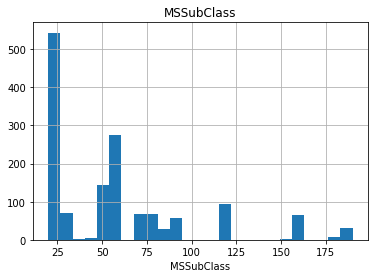

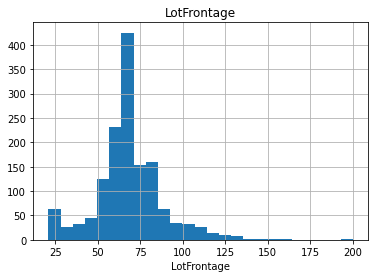

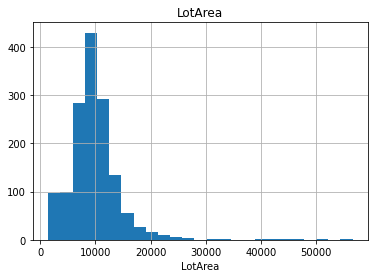

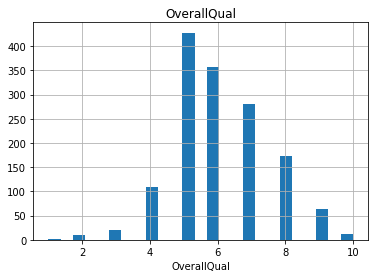

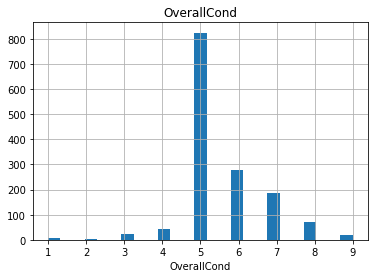

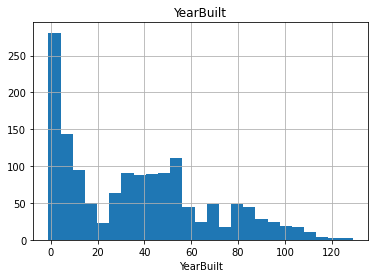

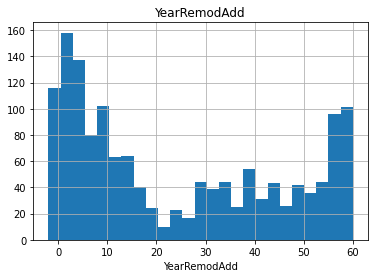

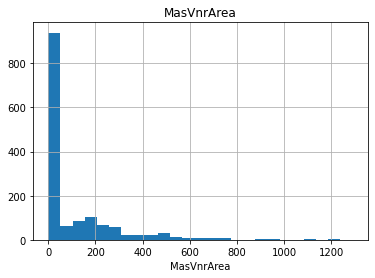

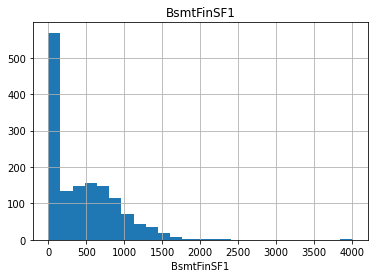

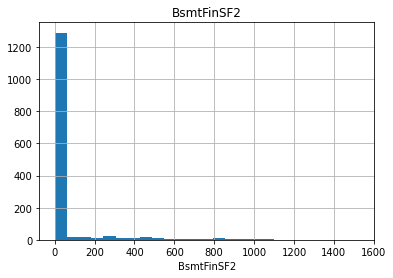

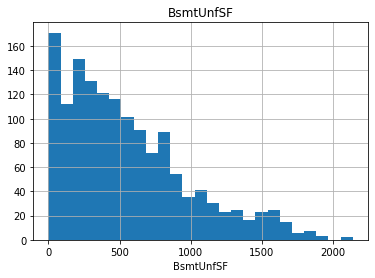

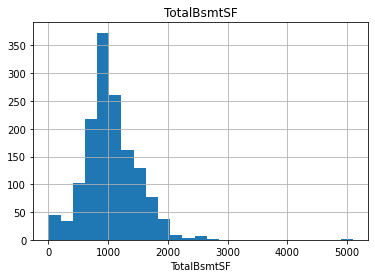

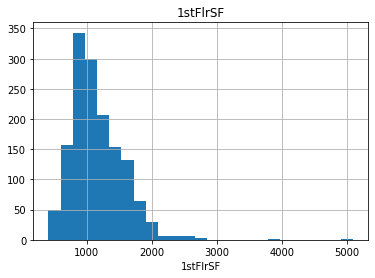

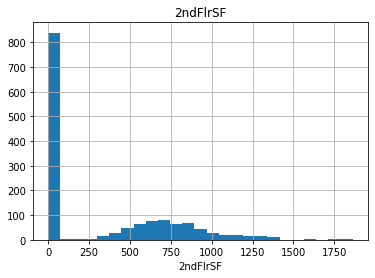

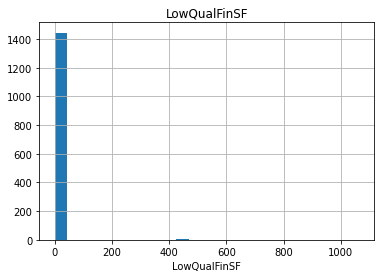

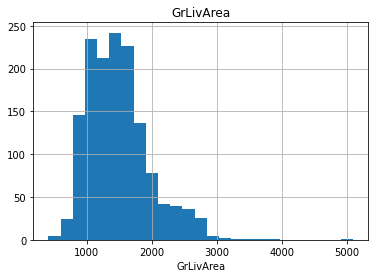

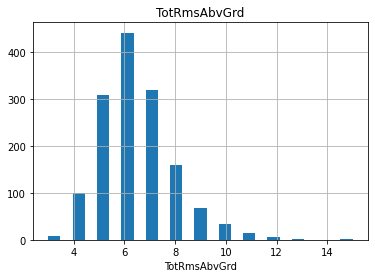

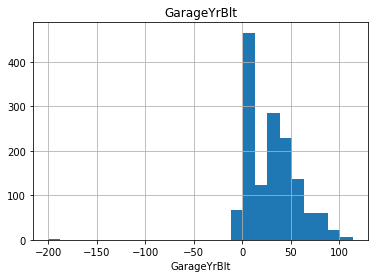

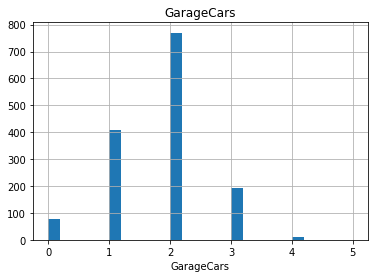

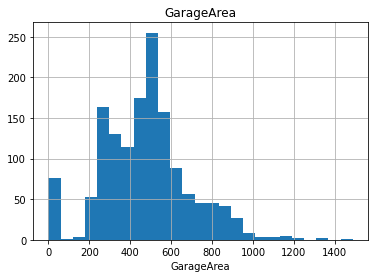

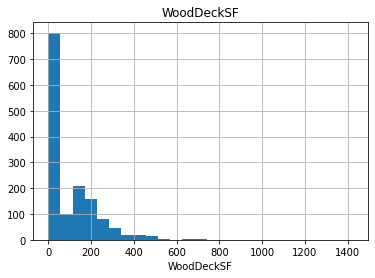

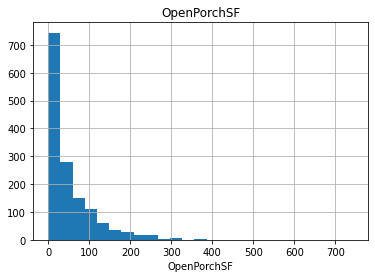

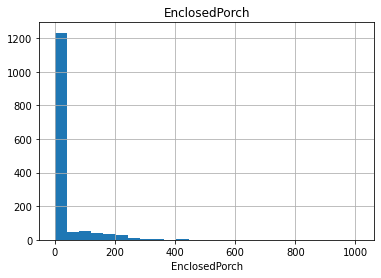

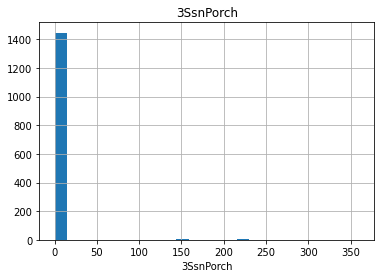

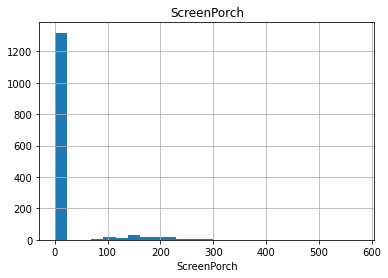

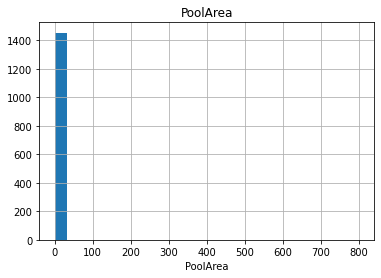

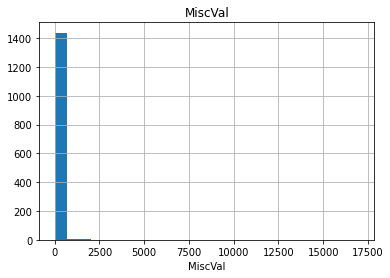

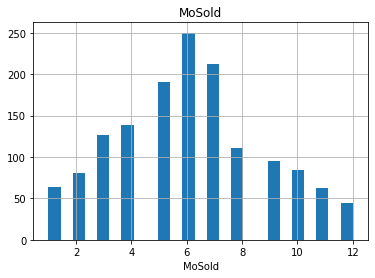

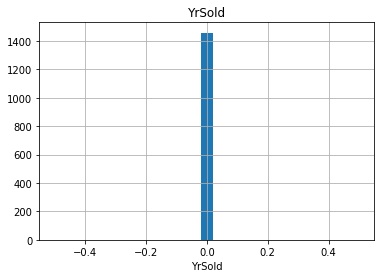

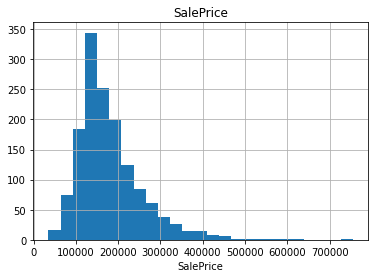

In [40]:
# plotting a histogram to see the distribution of the continuous features

for feature in continuous_features_for_test:
    dataset_test[feature].hist(bins = 25)
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

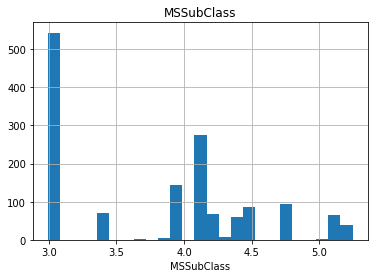

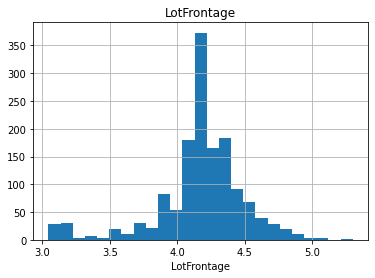

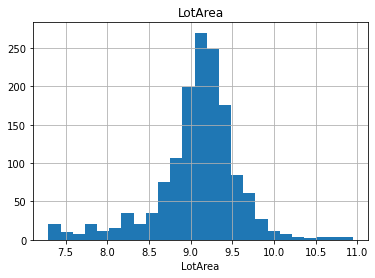

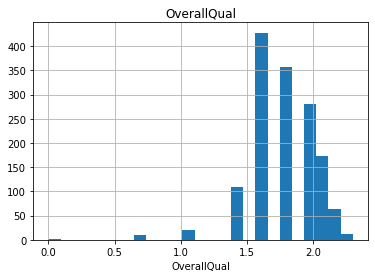

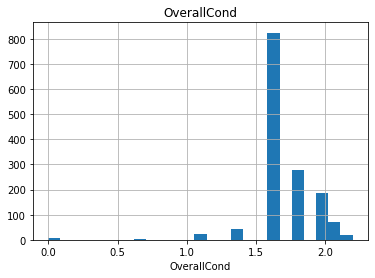

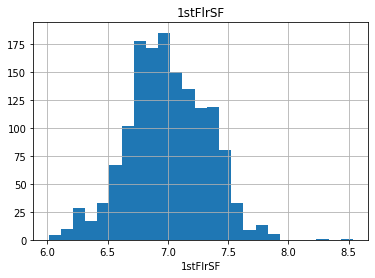

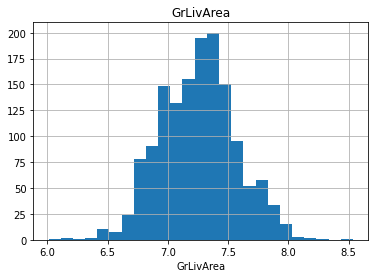

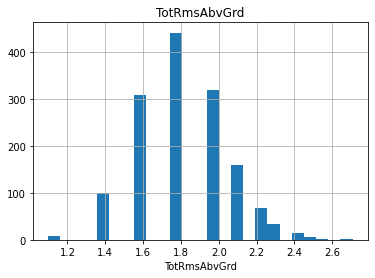

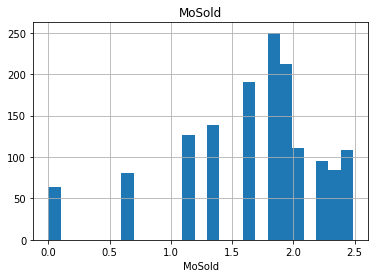

In [41]:
# making the data of continuous features as normal distributed

for feature in continuous_features_for_test:
    if 0 in dataset_test[feature].unique() or feature == "SalePrice":
        pass
    else:
        dataset_test[feature] = np.log(dataset_test[feature])
        dataset_test[feature].hist(bins = 25)
        plt.xlabel(feature)
        plt.title(feature)
        plt.show()

In [42]:
# removing the features Id and YrSold since there is no use in the prediction 
dataset_test = dataset_test.drop(["Id", "YrSold"], axis = 1)

In [43]:
dataset_test.shape

(1459, 79)

In [44]:
# storing the categorical features 

categorical_features_for_test = [feature for feature in dataset_test.columns if dataset_test[feature].dtype == "O"]
len(categorical_features_for_test)

43

In [45]:
nan_categorical_features_for_test = [feature for feature in categorical_features_for_test if dataset_test[feature].isnull().sum()>1]
len(nan_categorical_features_for_test)

18

In [46]:
for feature in nan_categorical_features_for_test:
    percentage = ((dataset_test[feature].isnull().sum())/(len(dataset_test)))*100
    print("NaN values percentage in", feature, "{} %".format(np.round(percentage, 4)))

NaN values percentage in MSZoning 0.2742 %
NaN values percentage in Alley 92.6662 %
NaN values percentage in Utilities 0.1371 %
NaN values percentage in MasVnrType 1.0966 %
NaN values percentage in BsmtQual 3.0158 %
NaN values percentage in BsmtCond 3.0843 %
NaN values percentage in BsmtExposure 3.0158 %
NaN values percentage in BsmtFinType1 2.8787 %
NaN values percentage in BsmtFinType2 2.8787 %
NaN values percentage in Functional 0.1371 %
NaN values percentage in FireplaceQu 50.0343 %
NaN values percentage in GarageType 5.209 %
NaN values percentage in GarageFinish 5.3461 %
NaN values percentage in GarageQual 5.3461 %
NaN values percentage in GarageCond 5.3461 %
NaN values percentage in PoolQC 99.7944 %
NaN values percentage in Fence 80.1234 %
NaN values percentage in MiscFeature 96.5045 %


In [47]:
# handling the NaN values in categorical features
for feature in nan_categorical_features_for_test:
    dataset_test[feature] = dataset_test[feature].fillna("Missing")
    print(dataset_test[feature].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [48]:
# handling the rare values

for feature in categorical_features_for_test:
    percentage_var = (dataset_test.groupby(feature)["SalePrice"].count())/len(dataset_test)
    # print(percentage_var)
    rare_categories = percentage_var[percentage_var<0.01].index
    # print(rare_categories)
    dataset_test[feature] = np.where(dataset_test[feature].isin(rare_categories), "Rare Feature", dataset_test[feature])

dataset_test[categorical_feature].head()


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,Rare Feature,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Missing,Attchd,Unf,TA,TA,Y,Missing,MnPrv,Missing,WD,Normal
1,RL,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Missing,Attchd,Unf,TA,TA,Y,Missing,Missing,Rare Feature,WD,Normal
2,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,Missing,MnPrv,Missing,WD,Normal
3,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,Missing,Missing,Missing,WD,Normal
4,RL,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Missing,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal


In [49]:
# converting the categorical features into numerical feature

for feature in categorical_features_for_test:    
    stored_indexes = dataset_test.groupby(feature)["SalePrice"].mean().sort_values().index
    # print(stored_indexes)
    stored_indexes = {k:i for i, k in enumerate(stored_indexes, 0)}
    dataset_test[feature] = dataset_test[feature].map(stored_indexes)
    

In [50]:
dataset_test[categorical_features_for_test].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,0,1,0,3,1,1,1,17,1,1,0,3,0,0,6.0,4.0,4,3,2,2,4,2,2,3,4,1,2,1,2,1.0,3,1,3,2,2,3,2,1,2,2,2.0,3
1,4,0,1,1,3,1,2,1,17,3,1,0,3,1,0,5.0,6.0,3,3,2,2,4,2,2,5,6,1,2,1,2,2.0,3,1,3,2,2,3,2,1,1,0,2.0,3
2,4,0,1,1,3,1,1,1,19,3,1,0,2,0,0,6.0,4.0,4,3,2,4,2,2,2,1,6,1,4,1,2,1.0,3,5,3,0,2,3,2,1,2,2,2.0,3
3,4,0,1,1,3,1,1,1,19,3,1,0,2,0,0,6.0,4.0,3,3,2,4,4,2,2,1,6,1,3,1,2,2.0,3,2,3,0,2,3,2,1,1,2,2.0,3
4,4,0,1,1,2,1,1,1,20,3,1,2,3,0,0,9.0,10.0,4,2,2,4,2,2,2,5,6,1,3,1,2,2.0,3,1,3,3,2,3,2,1,1,2,2.0,3


In [51]:
# scaling the categorical features

from sklearn.preprocessing import MinMaxScaler
scalar_for_test = MinMaxScaler()

In [52]:
scaling_features_for_test = [feature for feature in dataset_test.columns if feature != "SalePrice"]
len(scaling_features_for_test)

78

In [53]:
scalar_for_test.fit(dataset_test[scaling_features_for_test])
dataset_test[scaling_features_for_test] = pd.DataFrame(scalar_for_test.transform(dataset_test[scaling_features_for_test]))

In [54]:
dataset_test.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice
0,0.000000,0.75,0.593445,0.566360,0.0,0.5,0.000000,1.000000,1.0,0.25,0.5,0.85,0.166667,1.0,0.0,0.6,0.698970,0.815465,0.384615,0.822581,0.0,0.0,0.6,0.363636,1.00,0.000000,1.000000,0.666667,0.5,1.0,0.5,0.50,0.500000,0.116708,0.666667,0.094364,0.126168,0.173111,1.0,0.50,1.0,0.666667,0.312253,0.000000,0.0,0.312253,0.000000,0.0,0.25,0.0,0.333333,0.5,0.333333,0.317394,0.75,0.00,0.2,0.5,0.792994,0.666667,0.2,0.490591,0.666667,1.0,1.0,0.098315,0.000000,0.0,0.0,0.208333,0.0,1.0,0.50,1.0,0.000000,0.721057,0.5,0.75,208500
1,0.000000,1.00,0.598957,0.622527,0.0,0.5,0.333333,1.000000,1.0,0.50,0.5,0.85,0.500000,1.0,0.0,0.6,0.778151,0.815465,0.407692,0.870968,0.5,0.0,0.5,0.545455,0.75,0.083721,1.000000,0.666667,0.5,1.0,0.5,0.50,0.833333,0.230175,1.000000,0.000000,0.189720,0.260844,1.0,0.50,1.0,0.666667,0.468253,0.000000,0.0,0.468253,0.000000,0.0,0.25,0.5,0.500000,0.5,0.666667,0.430677,0.75,0.00,0.2,0.5,0.802548,0.666667,0.2,0.209677,0.666667,1.0,1.0,0.275983,0.048518,0.0,0.0,0.000000,0.0,1.0,0.25,0.0,0.735294,0.721057,0.5,0.75,181500
2,0.487992,1.00,0.558854,0.614005,0.0,0.5,0.333333,1.000000,1.0,0.25,0.5,0.95,0.500000,1.0,0.0,0.4,0.698970,0.732487,0.107692,0.225806,0.0,0.0,0.6,0.363636,1.00,0.000000,1.000000,0.666667,1.0,0.5,0.5,0.50,0.166667,0.197257,1.000000,0.000000,0.064019,0.182139,1.0,1.00,1.0,0.666667,0.326139,0.376477,0.0,0.548792,0.000000,0.0,0.50,0.5,0.500000,0.5,0.333333,0.430677,0.75,0.25,1.0,0.5,0.678344,0.000000,0.4,0.323925,0.666667,1.0,1.0,0.148876,0.045822,0.0,0.0,0.000000,0.0,1.0,0.50,1.0,0.000000,0.442114,0.5,0.75,223500
3,0.487992,1.00,0.582212,0.524583,0.0,0.5,0.333333,1.000000,1.0,0.25,0.5,0.95,0.500000,1.0,0.0,0.4,0.778151,0.815465,0.100000,0.225806,0.0,0.0,0.6,0.363636,0.75,0.015504,1.000000,0.666667,1.0,1.0,0.5,0.50,0.166667,0.150125,1.000000,0.000000,0.151402,0.181747,1.0,0.75,1.0,0.666667,0.325285,0.364125,0.0,0.542672,0.000000,0.0,0.50,0.5,0.500000,0.5,0.666667,0.526456,0.75,0.25,0.4,0.5,0.675159,0.000000,0.4,0.315860,0.666667,1.0,1.0,0.252809,0.048518,0.0,0.0,0.000000,0.0,1.0,0.25,1.0,0.000000,0.721057,0.5,0.75,140000
4,0.795881,1.00,0.317987,0.335596,0.0,0.5,0.333333,0.666667,1.0,0.25,0.5,1.00,0.500000,1.0,0.5,0.6,0.903090,0.732487,0.146154,0.322581,0.0,0.0,0.9,0.909091,1.00,0.000000,0.666667,0.666667,1.0,0.5,0.5,0.50,0.833333,0.065586,1.000000,0.000000,0.475234,0.251227,1.0,0.75,1.0,0.666667,0.453388,0.000000,0.0,0.453388,0.000000,0.0,0.50,0.0,0.333333,0.5,0.666667,0.317394,0.75,0.00,0.2,0.5,0.694268,1.000000,0.4,0.340054,0.666667,1.0,1.0,0.000000,0.110512,0.0,0.0,0.250000,0.0,1.0,0.25,1.0,0.000000,0.000000,0.5,0.75,250000
5,0.487992,1.00,0.564810,0.525186,0.0,0.5,0.333333,1.000000,1.0,0.50,0.5,0.95,0.500000,1.0,0.0,0.4,0.778151,0.732487,0.138462,0.290323,0.0,0.0,0.9,0.909091,1.00,0.000000,1.000000,0.666667,1.0,0.5,0.5,0.50,0.666667,0.000000,1.000000,0.000000,0.356542,0.149755,1.0,1.00,1.0,0.666667,0.248672,0.479055,0.0,0.555058,0.000000,0.0,0.50,0.5,0.500000,0.5,0.333333,0.526456,0.75,0.25,1.0,0.5,0.691083,0.000000,0.4,0.295699,0.666667,1.0,1.0,0.110253,0.113208,0.0,0.0,0.000000,0.0,1.0,0.25,1.0,0.000000,0.557886,0.5,0.75,143000
6,0.000000,1.00,0.514763,0.463378,0.0,0.5,0.333333,1